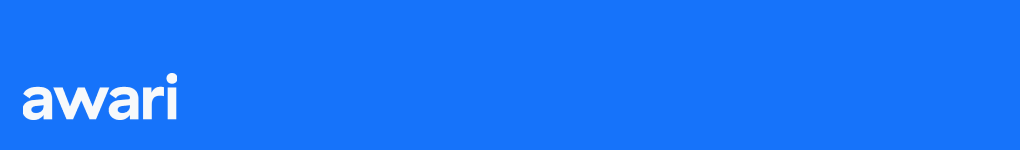

Prática da **Aula 10: Estatística Inferencial II**, do curso de **Data Science** da **[Awari](https://awari.com.br/)**. Para utilizá-la, vá no menu "Arquivo" e, em seguida, na opção "Salvar uma cópia no Drive". Isto criará uma cópia deste notebook em uma pasta chamada "Colab Notebooks", no seu Google Drive pessoal. Use a cópia para criar novas células de código ou executar as células desta prática.

---

# **Distribuições Discretas**

## **Objetivo**

Nesta prática, vamos ver sobre outros tipos de distribuições. Trataremos de:

* Distribuição de Bernoulli;
* Distribuição Binomial;
* Distribuição de Poisson; e
* Distribuição Qui-Quadrado.

## **Prática**

### **Distribuição de Bernoulli**

Vamos usar a função [scipy.stats.bernoulli](https://het.as.utexas.edu/HET/Software/Scipy/generated/scipy.stats.bernoulli.html#scipy-stats-bernoulli), da biblioteca SciPy (Scientific Python) para gerar variáveis randômicas discretas:

In [ ]:
from scipy.stats import bernoulli
import seaborn as sns
import numpy as np

Gerando 1000 ensaios:

In [ ]:
dados_be = bernoulli.rvs(size=1000, p=0.5)

Visualizando o *array* gerado:

In [ ]:
dados_be

Vamos encontrar os elementos unicos de uma matriz, utilizando [`np.unique`](https://numpy.org/doc/stable/reference/generated/numpy.unique.html), que retorna os elementos exclusivos classificados de uma matriz:

In [ ]:
np.unique(dados_be, return_counts=True)

Então, vamos visualizar então como fica a distribuição de Bernoulli em um gráfico:

In [ ]:
sns.displot(dados_be, kde=True);

### **Distribuição Binomial**

Vamos usar a função [`scipy.stats.binom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) para gerar variáveis randômicas discretais binomiais:


In [ ]:
from scipy.stats import binom

In [ ]:
# Gerando amostra randômica
dados_binom = binom.rvs(size=1000, n=10, p=0.8)

In [ ]:
# Verificando as variáveis geradas
dados_binom

Então, vamos encontrar os elementos unicos de uma matriz novamente, utilizando `np.unique` e plotar o gráfico da distribuição:

In [ ]:
np.unique(dados_binom, return_counts=True)

In [ ]:
sns.displot(dados_binom, kde=True);

### **Distribuição de Poisson**

Usaremos a função [`scipy.stats.poisson`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson) para gerar as variáveis:

In [ ]:
from scipy.stats import poisson

In [ ]:
# Gerando amostra
dados_poisson = poisson.rvs(size=1000, mu=1)

In [ ]:
# Intervalo da amostra gerada
min(dados_poisson), max(dados_poisson)

In [ ]:
# Elementos únicos
np.unique(dados_poisson, return_counts=True)

In [ ]:
# Analisando Poisson em um gráfico
sns.displot(dados_poisson, kde=True);

### **Distribuição Qui-Quadrado**

#### **Importando as bibliotecas**

Aqui, o Scipy nos ajuda novamente com `chi2_contingency`:

In [ ]:
# Importando bibliotecas
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import pandas as pd

#### **Obtendo um dataset**

Esta base de dados utilizada a seguir foi obtida do [Kaggle]((https://www.kaggle.com/datasets/julienjta/wrestling-world-tournament?resource=download)) em 12/09/2022.



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/persival-iania/datasets/main/data.csv')

In [ ]:
df

A base tem 500 linhas e 15 colunas. Ela contém informações de 500 lutadores de três federações, que competiram em lutas de um contra um. As colunas, variáveis ou *features* significam:

* Nome
* Gênero
* Idade
* Altura
* Nacionalidade
* Peso
* Arte marcial praticada
* Número de horas diárias gastas em treino
* Escore de força
* Escore de agilidade
* Escore de capaciedade mental
* Federação
* Ano de início no esporte
* Ranking final na competição

#### **Problema a ser analisado**

Queremos analisar a base de dados a fim de entender se as diferentes características de cada lutador podem indicar uma posição maior ou menor no ranking final.

Para solucioná-lo, seria possível analisar cada uma das variáveis isoladamente e observar como o comportamento delas pode mudar a depender do ranking.

Buscando automatizar esse processo e obter resultados mais confiáveis, podemos utilizar um teste estatístico para comparar as variáveis categóricas: o Teste Qui-Quadrado.

#### **Explorando os dados**

Uma boa forma de entendermos o comportamento das variáveis de nossa base de dados é com a utilização de histogramas.

É possível realizar o plot do histograma de cada variável pela biblioteca Pandas:

In [ ]:
df.gender.hist()

Contudo, para termos uma visão geral da base, podemos utilizar um `for` para plotar o histograma de todas as variáveis de interesse:

In [ ]:
var = ['gender', 'age', 'height', 'nationality', 'weight', 'sports', 'hours_per_day', 'strength', 'agility', 'mental', 'rank', 'federation']

for i in var:
    plt.figure(figsize = (10, 6))
    plt.hist(df[i]);
    plt.title(f'Histograma da variável {i}')
    plt.show()

#### **Características observadas**

* Variáveis categóricas:
  * gender
  * nationality
  * sports
  * federation
* Variáveis numéricas:
  * age
  * height
  * weight
  * hours per day
  * strength
  * agility
  * mental

Para comparar as variáveis numéricas com a variável `rank`, será necessário agrupá-las em intervalos para ser possível analisá-las em conjunto.

Ademais, como a variável `sports` possui diversas opções combinadas, será necessário separar cada uma das variáveis em uma coluna.

#### **Criando e tratando variáveis categóricas**


In [ ]:
df.sports = df.sports.str.replace(' ', '') # retirar espaçamento entre sports
df.sports.str.get_dummies(sep = ',') # criar variáveis dummies para cada esporte

Adicionando a tabela gerada anteriormente ao DataFrame:

In [ ]:
df = pd.concat([df, df.sports.str.get_dummies(sep = ',')], axis = 1) # adicionar a tabela gerada anteriormente ao dataframe


Substituindo 1 e 0 por yes e no:

In [ ]:
# substituir 1 e 0 por yes e no
for i in ['Boxing', 'Judo', 'Karate', 'Kick-Boxing', 'MMA']:
    df[i] = np.where(df[i] == 1, 'Yes', 'No')

In [ ]:
# removendo a coluna sports
df.drop(columns = 'sports', inplace = True) # remover a coluna de sports

In [ ]:
df

Ajustando os rótulos das categorias:

In [ ]:
df['age_cat'] = pd.cut(df.age, bins = [18, 25, 28, 30, 33, 35, 60], labels = ['18-25', '26-28', '29-30', '31-33', '34-35', '36-60'], include_lowest = True)
df['height_cat'] = pd.cut(df.height, bins = [150, 165, 170, 175, 180, 185, 205], labels = ['150-165', '166-170', '171-175', '176-180', '181-185', '186-205'], include_lowest = True)
df['weight_cat'] = pd.cut(df.weight, bins = [65, 80, 85, 90, 95, 100, 125], labels = ['65-80', '81-85', '86-90', '91-95', '96-100', '101-125'], include_lowest = True)
df['hours_per_day_cat'] = pd.cut(df.hours_per_day, bins = [0, 2, 4, 8], labels = ['0-2', '3-4', '5-8'], include_lowest = True)
df['strength_cat'] = pd.cut(df.strength, bins = [0, 4, 6, 10], labels = ['0-4', '5-6', '7-10'], include_lowest = True)
df['agility_cat'] = pd.cut(df.agility, bins = [0, 4, 6, 10], labels = ['0-4', '5-6', '7-10'], include_lowest = True)
df['mental_cat'] = pd.cut(df.mental, bins = [0, 4, 6, 10], labels = ['0-4', '5-6', '7-10'], include_lowest = True)
df['rank_cat'] = np.where(df['rank'] <= 100, '0-100',
                         np.where(df['rank'] <= 200, '101-200',
                                 np.where(df['rank'] <= 300, '201-300',
                                         np.where(df['rank'] <= 400, '301-400', '401-500'))))

#### **Teste Qui-Quadrado**

Para realizar o teste Qui-Quadrado, precisamos escolher as variáveis que iremos testar:

In [ ]:
df.columns

Vamos escolher duas variáveis:

In [ ]:
var1 = 'rank_cat'
var2 = 'gender'

Também é necessário construir uma tabela em que todos os valores da variável 1 sejam linhas e que todos os valores da variável 2 sejam colunas:

In [ ]:
chi = pd.crosstab(df[var1], df[var2])
chi

## **Sugestões ao instrutor e aos alunos**

Caso seja viável no tempo de aula, o instrutor por abordar mais exemplos ou deter-se melhor sobre os casos tratados aqui.

Aos alunos, cabe lembrar que as mesmas análises feitas aqui podem ser aplicadas a outros datasets. Vale ler mais a respeito destas distribuições e procurar dados que possuem estas distribuições para analisá-los.

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**